In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Binomial Distribution

As the prefix *bi-* implies, the Binomial Probability distribution describes a situation with two possible outcomes - often times described as 'success' or 'failure'.

## Bernoulli Trials

Statisticians call any random experiment with two possible outcomes as described above a **Bernoulli Trial**. For example, flipping a coin has two outcomes: "Heads" or "Tails" each with a fixed probability. Each independent coin flip would be a Bernoulli trial. Many other scenarios can be presented as Bernoulli trials as well. Consider a standard, shuffled deck of cards. I am interested in whether the top card in the deck is a 7. The card either is or is not a 7 (two options) so independent events of flipping the top card of a shuffled deck are Bernoulli trials.

## What is the Binomial Distribution?

The **Binomial distribution** describes the probability of specific types of experiments called a sequence of Bernoulli trials. Such a sequence satisfies

*   There are a fixed, $n$, number of trials
*   There are exactly two possible  outcomes - often times described as 'success' or 'failure'.
*   Each trial is independent (i.e. does not depend on outcomes of previous trials)
*   The probability of success, $p$, is the same for each trial


Examples satisfying these requirements include: flipping a coin 5 times to see how many heads occur or having 6 children to see how many girls are born. In each of these cases, we are dealing with counts of successes. This means that the binomial distribution is a *discrete* probability distribution.

## Binomial Empirical Distribution

Let's again consider our six-sided die for a different experiment! Suppose we are interested in rolling a die and getting an even number. We want to know what happens if we repeat this trial 10 times, what is the probability that we have 1 success (1 even), 2 successes (2 evens), 3 successes...?

This example is indeed a sequence of Bernoulli trials as there are a fixed $n=10$ number of trials, there are exactly two outcomes: evens - 'success' and odds - 'failure', each trail is independent, and the probability of success is $p=0.5$.
To determine what this distribution looks like through observation, we would repeat this experiment 100, 1000 or more times to get an empirical distribution.

Recall in [Section 5.2: Conditional Statements](../../05/2/Control_Statements_conditionals.ipynb) we experimented with a parity function which finds the number of even dice rolls when rolling a six-sided die five times.

Below we'll redefine the six-sided die and re-run our simulation from Section 5.2 with experiments of size 10, 100, and 1,000.

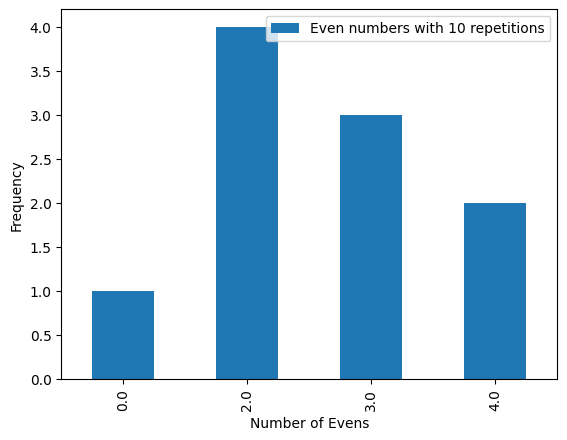

In [3]:
die = np.arange(1, 7)

def parity(input_integer):
    if (input_integer % 2) == 0:
        return "even"
    else:
        return "odd"

vec_parity = np.vectorize(parity)

np.random.seed(1234)

def parity_experiment(num_experiments):
  total_evens = np.empty(0)
  for i in np.arange(num_experiments):
      choices = np.random.choice(die, 5)
      labels = vec_parity(choices)

      total_evens = np.append(total_evens, sum(labels == 'even'))

  legend = f'Even numbers with {num_experiments:,} repetitions'

  options, counts = np.unique(total_evens, return_counts=True)
  pd.DataFrame({legend:counts}, index=options).plot.bar()

  plt.xlabel('Number of Evens')
  plt.ylabel("Frequency");

parity_experiment(10)

This histogram records the observed number of evens (out of 5 dice rolls) with this experiment repeated num_experiment=10 times. For example, there were 2 evens recorded from 4 experiments, 3 evens recorded from 3 experiments, and 4 evens recorded from 2 experiments.

The empirical probability of 2 evens rolled out of 5 is $4/10=0.4$.

We repeat the experiment below by changing the num_experiments to 100 and then 1000 to see the resulting empirical distribution.

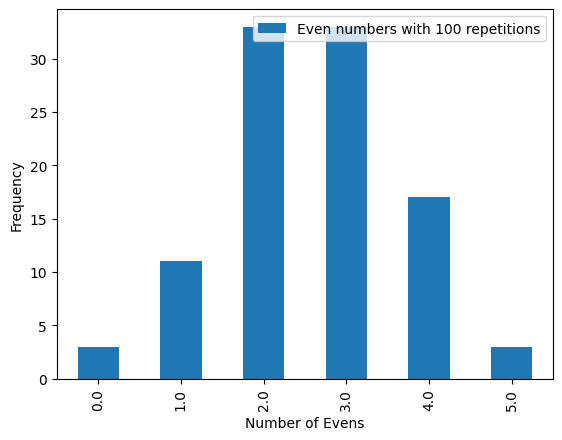

In [4]:
np.random.seed(1234)
parity_experiment(100)

Above the empirical probability of 2 even numbers rolled out of 5 is $33/100 = 0.33$.

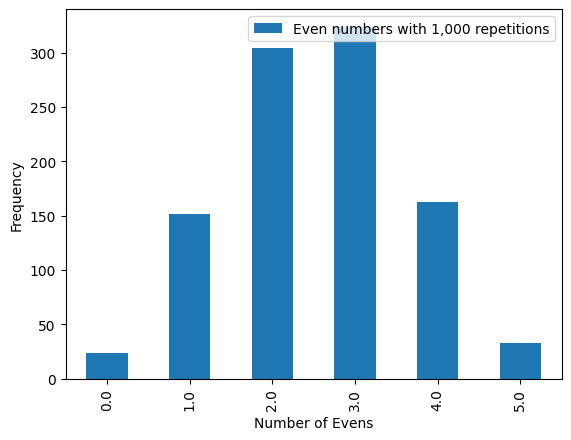

In [5]:
parity_experiment(1000)

And above the observed probability that 2 even numbers were rolled in 5 tosses of the die is $304/1000 = 0.304$.

## Binomial Probability Distribution
For the event that we just simulated, we have the ability to calculate the probabilities for each event in the sample space.
In particular, we can assign probabilities corresponding to the number of successes. For a trial of $n$ experiments, we are interested in the probability of exactly $j$ successes, where $1 \leq j \leq n$.
Given a sequence of Bernoulli trials, we define a random variable $X$ that records the number of successes. The discrete distribution function for $X$ is called the Binomial Probability Distribution and its pmf is given by:

> $P(X=j) = b(n,p,j) = {n \choose j} p^j (1-p)^{n-j}.$



To dissect this formula, we first expand on the notation ${n \choose j}$, read "n choose j". In general, for non-negative numbers $n$ and $j$ with $0 \leq j \leq n$, ${n \choose j}$ counts the number of ways to choose $j$ objects from a set of $n$ while ignoring the order. Mathematically, we have:

> ${n \choose j} = \frac{n!}{j!(n-j)!} = \frac{n(n-1)(n-2)\cdot \cdot \cdot (n-(j-1))(n-j)!}{j! (n-j)!} = \frac{n(n-1)(n-2)\cdot \cdot \cdot (n-(j-1))}{j!},$


which says we have $n$ ways to choose the first element from a set of $n$ objects, $n-1$ ways to choose the second element from the remaining $n-1$ elements all the way up to $n-(j+1)$ ways to choose the $j^{th}$ element. But because order does not matter, that is the first element chosen is no different than the third, we have overcounted! There are $j!$ ways of ordering the $j$ chosen elements, so dividing by $j!$ gives us the number of subsets of size $j$ from an $n$ element set. The table below gives examples of how to calculate ${n \choose j}$. Notice the pattern in results. The number of ways to choose 2 elements from a set of 5 is the same as the number of ways to 3 elements (and therefore not choose 2 elements) from a set of 5.

| ${n \choose j}$  | $\frac{n!}{j!(n-j)!}$ | Number of ways<br>to choose j elements<br>from a set of n |
| ---------------- | ------------------ |------------------ |
| ${5 \choose 0}$     | $\frac{5*4*3*2*1}{0!(5*4*3*2*1)}$ | $=1$|
| ${5 \choose 1}$     | $\frac{5*4*3*2*1}{1!(4*3*2*1)}$ |  $=5$|
| ${5 \choose 2}$   |$\frac{5*4*3*2*1}{(2*1)(3*2*1}$  | $=10$ |
| ${5 \choose 3}$   | $\frac{5*4*3*2*1}{(3*2*1)(2*1)}$  | $=10$|
| ${5 \choose 4}$     | $\frac{5*4*3*2*1}{(4*3*2*1)1!}$ |  $=5$|
| ${5 \choose 5}$   |$\frac{5*4*3*2*1}{(5*4*3*2*1)0!}$  | $=1$|

How does ${n \choose j} p^j (1-p)^{n-j}$ count the probability of exactly $j$ successes in $n$ trials? Since the trials are independent, probabilities are multiplicative, so the probability of a sequence containing $j$ successes and $n-j$ failures is $\underbrace{p \cdot p \cdot \cdot \cdot p}_\text{j times} \cdot \underbrace{(1-p) \cdot \cdot \cdot (1-p)}_\text{n-j times}  = p^j\, (1-p)^{n-j}$. There are ${n \choose j}$ such sequences as we are choosing $j$ places in our sequence of length $n$ to be successes. Therefore ${n \choose j} p^j (1-p)^{n-j}$ gives the probability there are exactly $j$ successes in $n$ trials.

The example above of rolling a die 10 times and considering getting an even number is a sequence of Bernoulli trials and the probability can be determined by the Binomial Probability Distribution. As mentioned above, $n=10$ and $p=0.5$ in this example. Thus $P(X=2) = b(5,0.5,2) = {5 \choose 2} 0.5^2 (0.5)^{3} = 0.3125$. Recall above our empirical distribution gave a probability of $0.304$ for rolling 2 evens out of 5. Below we graph the bar plot in addition to a table corresponding to the probability distribution of this example.

| P(Number of Successes)  | Formula: b(n,p,j) | Probability |
| ---------------- | ------------------ |------------------ |
| P(X=0)     | $b(5,0.5,0)= {5 \choose 0} 0.5^0 (0.5)^{10}$ |  $=0.03125$|
| P(X=1)     | $b(5,0.5,1)= {5 \choose 1} 0.5^1 (0.5)^{9}$ |  $=0.15625$|
| P(X=2)   |$b(5,0.5,2) = {5 \choose 2}0.5^2(0.5)^{8}$  | $=0.3125$ |
| P(X=3)   | $b(5,0.5,3) = {5 \choose 3} 0.5^3 (0.5)^{7}$  | $=0.3125$|
| P(X=4)     | $b(5,0.5,4)= {5 \choose 4} 0.5^4 (0.5)^{6}$ |  $=0.15625$|
| P(X=5)   |$b(5,0.5,5) = {5 \choose 5}0.5^5(0.5)^{5}$  | $=0.03125$|








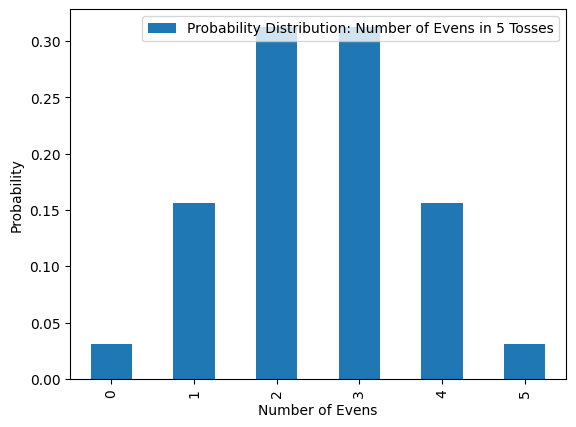

In [6]:
def binomial_prob(n, p, j):
  '''A function that calculates probabilities from a binomial distribution with parameters n and p'''
  n_choose_j = np.math.factorial(n)/(np.math.factorial(j)*np.math.factorial(n-j))
  return  n_choose_j*p**j*(1-p)**(n-j)

binomial_list =[]
n=5
p=0.5
for i in range(0,6):
  binomial_list.append(binomial_prob(n, p, i))

legend = f'Probability Distribution: Number of Evens in 5 Tosses'

pd.DataFrame({legend: binomial_list}).plot.bar();
plt.xlabel('Number of Evens')
plt.ylabel("Probability");

Notice that the graph looks symmetric around 2.5. You can see the symmetry even more when we increase the number of trials. Let's look at the number of evens in 10 rolls instead of 5.

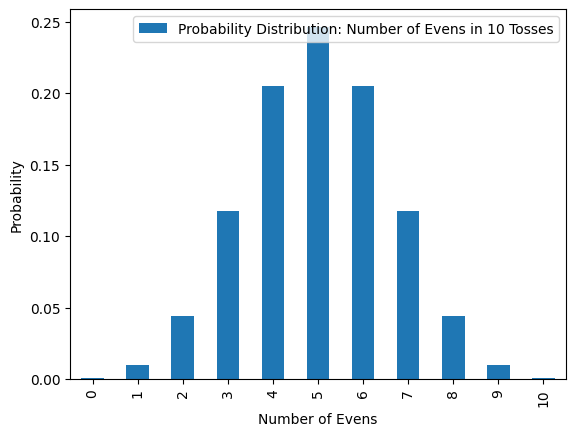

In [7]:
binomial_list =[]
n=10
p=0.5
for i in range(0,11):
  binomial_list.append(binomial_prob(n, p, i))

legend = f'Probability Distribution: Number of Evens in 10 Tosses'

pd.DataFrame({legend: binomial_list}).plot.bar();
plt.xlabel('Number of Evens')
plt.ylabel("Probability");

In fact, the shape of the graph is dependent on $p$, the probability of success. The closer $p$ is to $0.5$ the more symmetric it will be. Suppose we are instead interested in rolling the number 2 on a six-sided die. Here 'success' is rolling a 2, and 'failure' is rolling anything else. Thus, $p=\frac{1}{6}$. Below we see the probability distribution of this example.

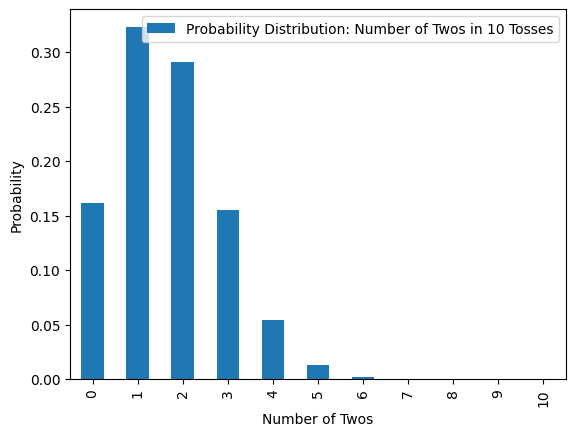

In [8]:
binomial_list =[]
n=10
p=1/6
for i in range(0,11):
  binomial_list.append(binomial_prob(n, p, i))

legend = f'Probability Distribution: Number of Twos in 10 Tosses'

pd.DataFrame({legend: binomial_list}).plot.bar();
plt.xlabel('Number of Twos')
plt.ylabel("Probability");

Here we see the peak of the distribution lies around 1. With a success probability of $\frac{1}{6}$, on average we should see about 1.6 twos in 10 tosses. Therefore a peak between 1 and 2 makes sense!

What we just calculated was the mean of our binomial distribution, 1.6. We calculated it by multiplying the probability of success by the number of trials. In general, we can calculate the mean by drawing a sample and taking the mean empirically, or computing it based on the expected value.
For given parameters $n$, and $p$, the formula for the mean of a binomial distribution is $E(X) = \mu(X) = n*p$. We can also calculate the standard deviation of the binomial distribution using $\sigma(X) = \sqrt{n*p*(1-p)}$. Evaluating this equation we see that the standard deviation of the binomial distribution with $n = 5$ and $p = \frac{1}{6}$ is:


In [9]:
np.sqrt(10*(1/6)*(1-(1/6)))

1.1785113019775793

## Normal Approximation to the Binomial Distribution

We learned in the [last section](../3/normal.ipynb) that the normal distribution has a number of special properties that make it easy to use. You will learn later in this book that many statistical methods are based on the normal distribution. For this reason, it is convenient to be able to model data using the normal distribution (even when the data is not actually normally distributed!). Sometimes, we can approximate other distributions using a version of the normal distribution. Specifically, we can use a **normal approximation to the binomial distribution**.

We can approximate a binomial distribution using a normal distribution when the number of trials, n, is 'sufficiently large'. The rule-of-thumb for deciding when n is large enough to do the approximation is to check the following:
- Is $np \geq 5$?
- Is $n(1-p) \geq 5$?

If both conditions are met, you can approximate the binomial distribution with a normal distribution with mean:

> $\mu = np$

and standard deviation:

> $\sigma = \sqrt{np(1-p)}$

Recall, we've been counting the number of occurrence of certain dice rolls. Let's now call a 'success' in our binomial experiment rolling either a 1 or a 6. There is a 1/3 probability of rolling a 1 or a 6 so this is our $p$. Now, let's count the number of successes in 50 dice rolls.

First, we check if n is large enough. We have $np = 50*(1/3) \approx 16.66 \geq 5$ and $np = 100*(1 - 1/3) \approx 33.33 \geq 5$. So, we can use the approximation.

Now, let's characterize our normal distribution. The mean is $np$ which we already calculated is approximately 16.66. The standard deviation is $\sqrt{np(1-p)} = \sqrt{100*(1/3)(2/3)} \approx 3.33$.

Below we compare the graph of the binomial distribution with n = 50 an p = 1/3 to the graph of the normal distribution with mean 16.66 and standard deviation 3.33.

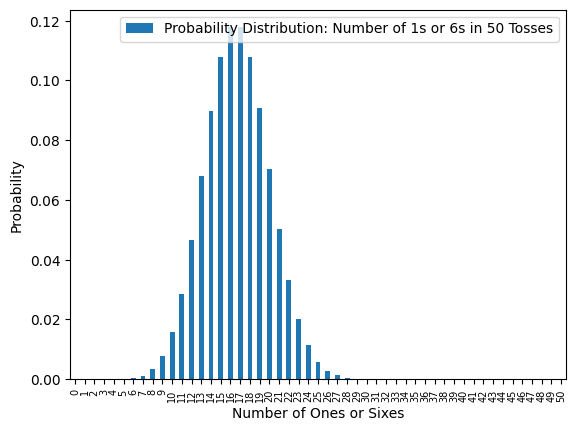

In [10]:
binomial_list =[]
n=50
p=1/3
for i in range(0,51):
  binomial_list.append(binomial_prob(n, p, i))

legend = f'Probability Distribution: Number of 1s or 6s in 50 Tosses'

pd.DataFrame({legend: binomial_list}).plot.bar();
plt.xlabel('Number of Ones or Sixes');
plt.ylabel("Probability");
plt.xticks(rotation = 90, fontsize=7);

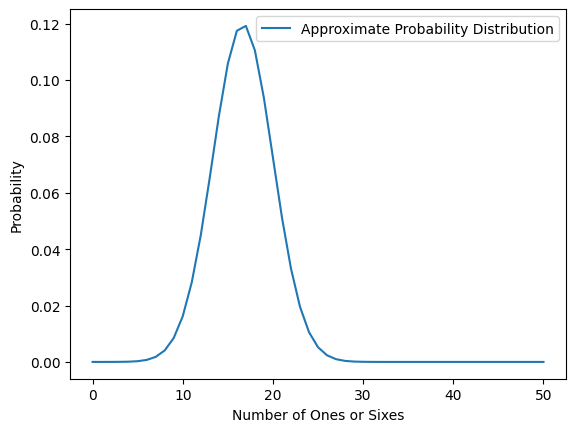

In [11]:
import scipy
import math

def normal_prob(mu, sigma, x):
    '''A function that calculates probabilities from a normal distribution with mean mu and standard deviation sigma'''
    bottom = math.sqrt(2 * math.pi * sigma**2)
    top = math.exp(-(x - mu)**2/(2 * sigma**2))
    return top/bottom

normal_list =[]
mu=16.66
sigma=3.33
for i in range(0,51):
  normal_list.append(normal_prob(mu, sigma, i))

legend = f'Approximate Probability Distribution'

pd.DataFrame({legend: normal_list}).plot();
plt.xlabel('Number of Ones or Sixes');
plt.ylabel("Probability");
#plt.xticks(rotation = 90, fontsize=7);

Now, let's view them together:

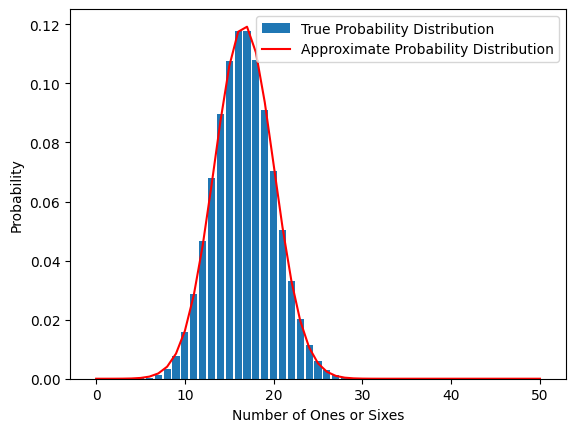

In [12]:
binomial_df = pd.DataFrame({"Real": binomial_list})
normal_df = pd.DataFrame({"Approximate": normal_list})

bin = plt.bar(height = binomial_df.Real, x = binomial_df.index)
norm, = plt.plot(normal_df, color='red')
plt.legend([bin, norm], ['True Probability Distribution','Approximate Probability Distribution'])
plt.xlabel('Number of Ones or Sixes');
plt.ylabel("Probability");
plt.show()

It looks like the normal is a pretty good approximation to the binomial in this case!

Learning about distributions like the ones presented in this chapter can help us better understand the data that we work with as data scientists. In the next few chapters, we will explore ways that statisticians and data scientists use distributions to test hypotheses about data.